# Whole Genome prior estimation
This note book document the steps to generate mixture priors and the analysis of its result

# Steps
## Conduct univariate analysis for each genes,for each tissues, using all the SNPs

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/susie-wgs-prior.ipynb susie  \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/AC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  -J 50 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml &

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/susie-wgs-prior.ipynb susie  \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/PCC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  -J 50 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml &

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/susie-wgs-prior.ipynb susie  \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/DLPFC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  -J 50 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml &

### Compute Mixture prior via flash and then estimate the weights of the prior with UDR and TEEM 
effect model = exchangable Z score

constraint for flash: both postivitiy and non-constraint result are reported.

In neither case is the bhat or zscore centered.

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/wg_prior_genome.ipynb mm_prior \
--molecular_pheno_dir /home/hs3163/Project/Genome_prior/data/molc_dir    \
--rds_list /home/hs3163/Project/Genome_prior/data/rds_list  \
--wd   /home/hs3163/Project/Genome_prior/merge \
--name "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--constraint "Both" \
-J 10 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &

### Conduct MV susie with mixture prior with both teem and udr of risk locus
Imputed X, complete case Y

In [ ]:
# Teem
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv    \
--molecular_pheno_dir "/home/hs3163/Project/Alz/multi/molecular_phenotype_list"   \
--region_list "/home/hs3163/Project/Alz/multi/mv_susie_gene_list.txt"  \
--wd "/home/hs3163/Project/Alz/multi_mp"  \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename"  \
--container /mnt/mfs/statgen/containers/twas_latest.sif --impute TRUE  --job_size 1 \
--cv_times 100  \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 50 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &


# UDR Prior
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv    \
--molecular_pheno_dir "/home/hs3163/Project/Alz/multi/molecular_phenotype_list"   \
--region_list "/home/hs3163/Project/Alz/multi/mv_susie_gene_list.txt"  \
--wd "/home/hs3163/Project/Alz/multi_mp_2"  \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename"  \
--container /mnt/mfs/statgen/containers/twas_latest.sif --impute TRUE  --job_size 1 \
--cv_times 100  \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.ed.UD_ED.rds'  -J 6 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &

### Conduct MV susie with mixture prior with both teem and udr of all genes
Imputed X, complete case Y

# Analysis

## Visualization of Mixuture priors


In [2]:
# Read Data
TEEM = readRDS('~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds')
UDR = readRDS('~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.ed.UD_ED.rds')
Ori = readRDS('~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.rds')

In [3]:
library(dplyr)
library(ggplot2)
library(tibble)
library(readr)
library(purrr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



### Component with weights
The component with strongest weight is tflash in both case, the second strongest is pca_2 in teem, XX in UDR

teem_logik,-125523.5
length,1.0
udr_logik,-126149.8
length,1.0


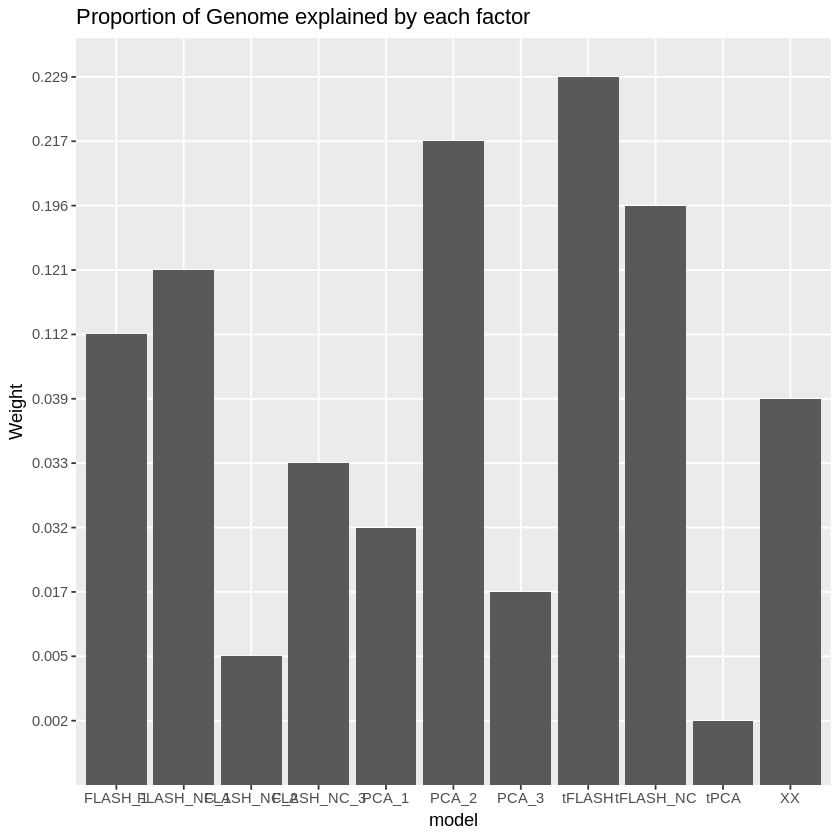

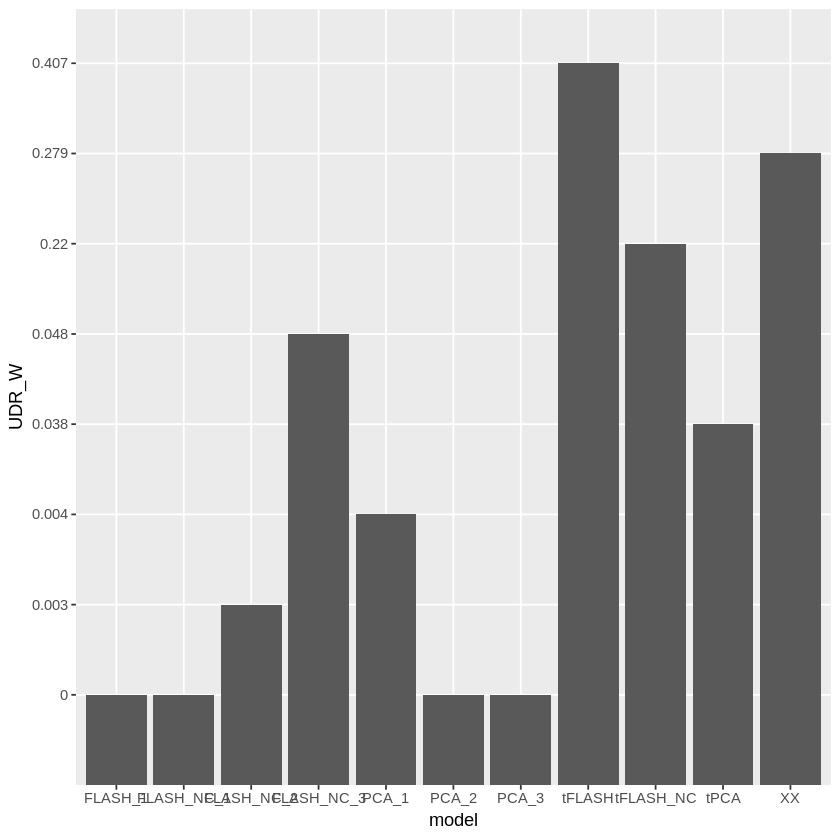

In [9]:
rbind(
teem_logik = TEEM$loglik[length(TEEM$loglik)],
length = length(TEEM$loglik),
udr_logik = UDR$loglik[length(UDR$loglik)],
length = length(UDR$loglik)
    )
cbind(model = names(TEEM$U), Teem_W = TEEM$w%>%round(3), UDR_W = UDR$w%>%round(3))%>%as_tibble%>%ggplot(aes(x = model))+geom_col(aes(x = model,y = Teem_W ))+ylab("Weight")+ggtitle("Proportion of Genome explained by each factor")
cbind(model = names(TEEM$U), Teem_W = TEEM$w%>%round(3), UDR_W = UDR$w%>%round(3))%>%as_tibble%>%ggplot(aes(x = model))+geom_col(aes(x = model,y = UDR_W ))

In [40]:
tol = 1E-15
names(UDR$U)[which(UDR$w<tol)]
names(TEEM$U)[which(TEEM$w<tol)]

ERROR: Error in eval(expr, envir, enclos): object 'UDR' not found


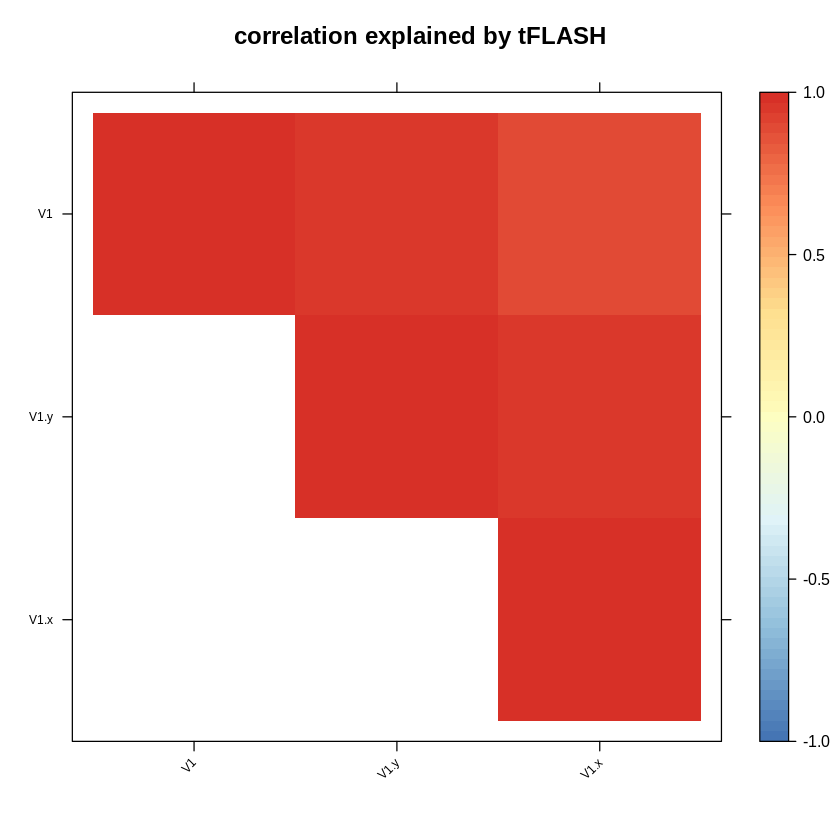

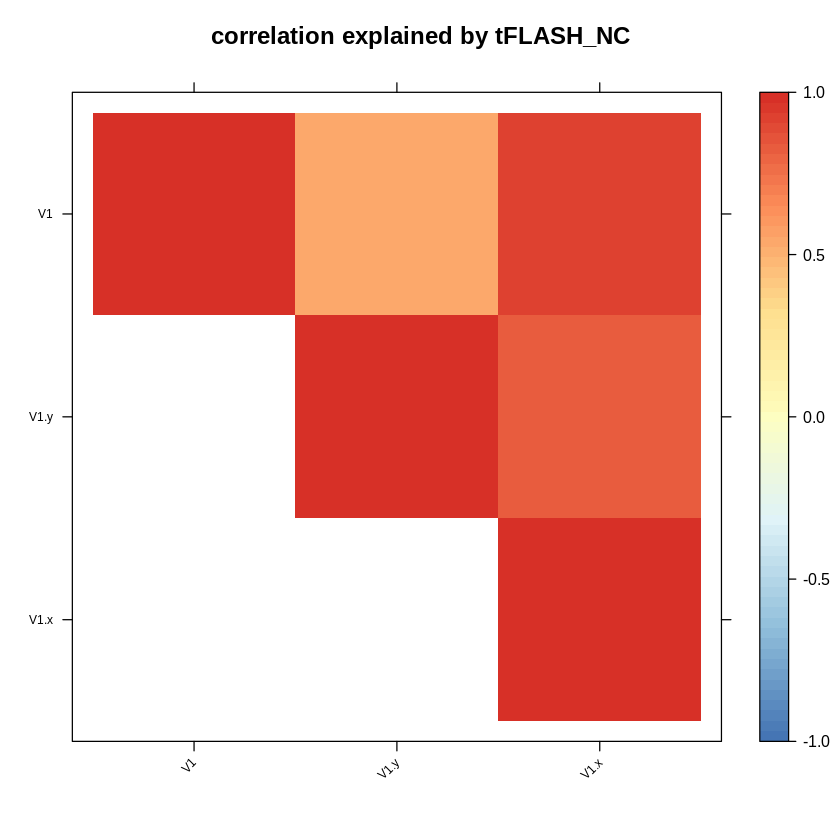

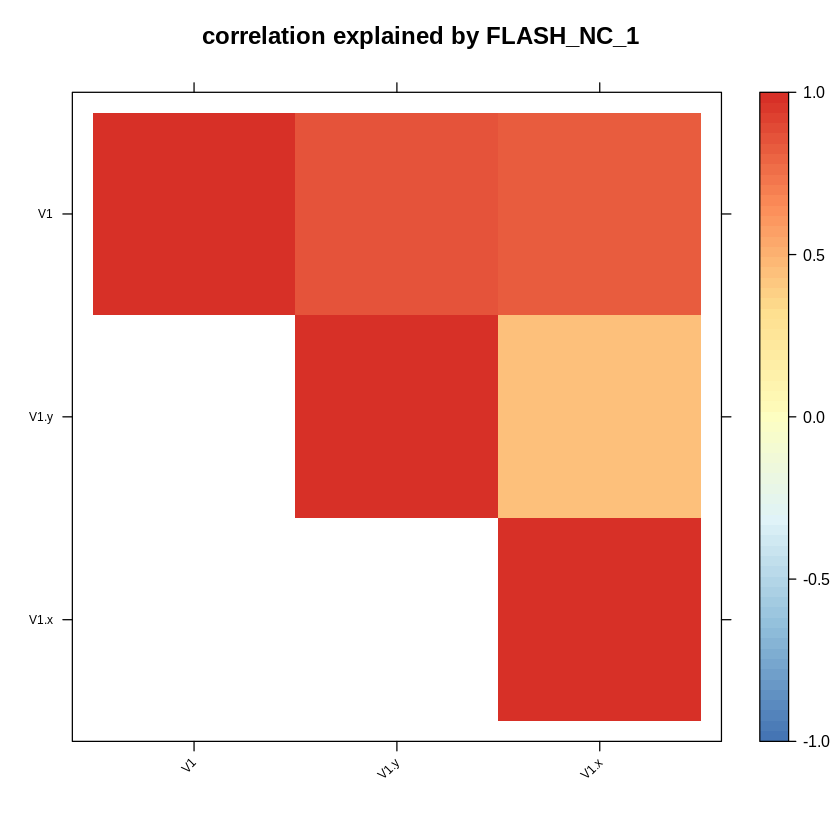

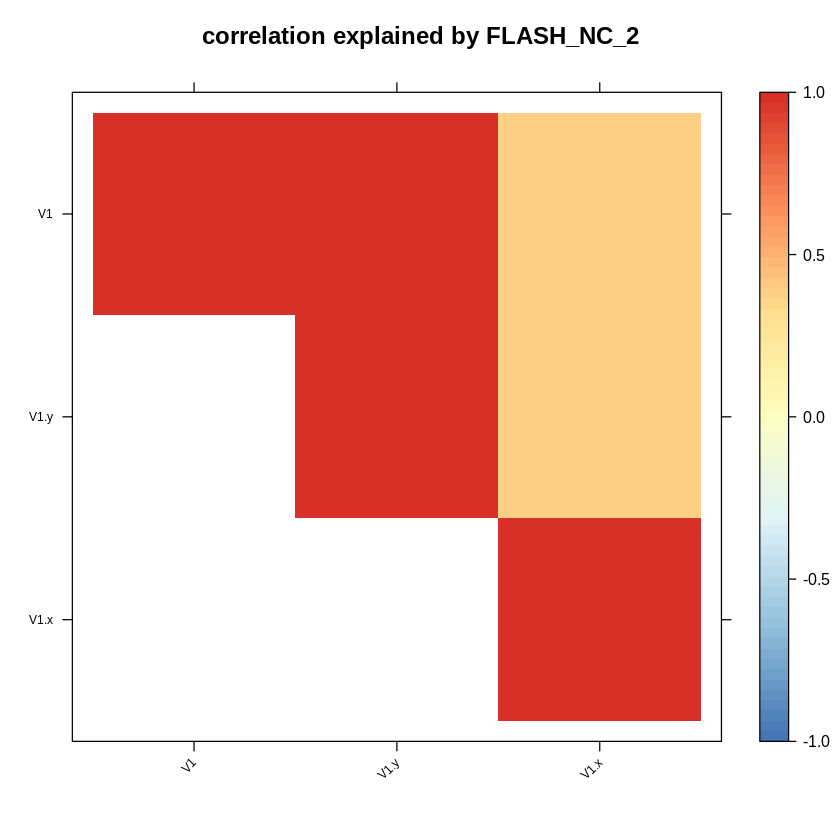

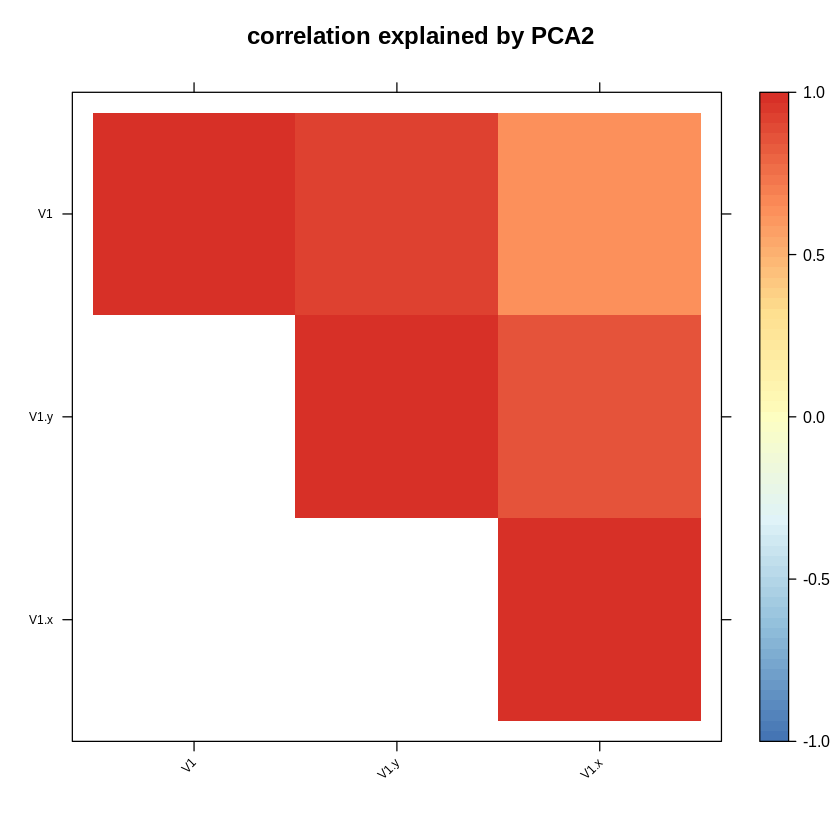

In [21]:
plot_sharing = function(X,title) {
clrs <- colorRampPalette(rev(c("#D73027","#FC8D59","#FEE090","#FFFFBF",
                               "#E0F3F8","#91BFDB","#4575B4")))(64)
lat <- cov2cor(X)
lat[lower.tri(lat)] <- NA
n <- nrow(lat)
print(lattice::levelplot(lat[n:1,],col.regions = clrs,xlab = "",ylab = "",
                colorkey = TRUE,at = seq(-1,1,length.out = 64),
                scales = list(cex = 0.6,x = list(rot = 45)), main = title)
    )
}
plot_sharing(TEEM$U$tFLASH,"correlation explained by tFLASH")
plot_sharing(TEEM$U$tFLASH_NC,"correlation explained by tFLASH_NC")
plot_sharing(TEEM$U$FLASH_NC_1,"correlation explained by FLASH_NC_1")
plot_sharing(TEEM$U$FLASH_NC_2,"correlation explained by FLASH_NC_2")
plot_sharing(TEEM$U$PCA_2,"correlation explained by PCA2")



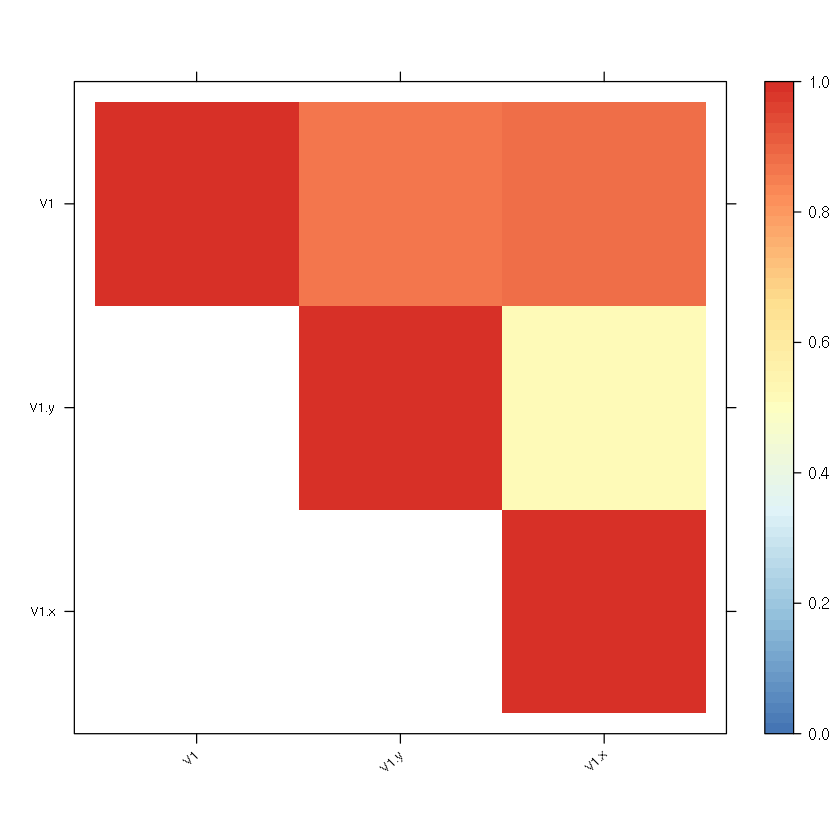

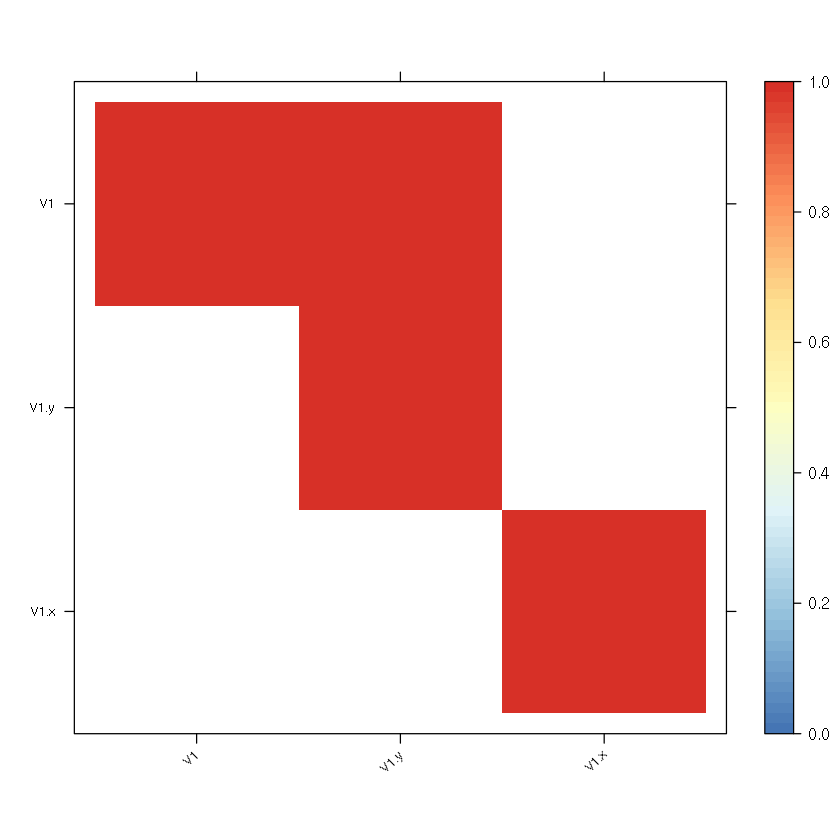

,V1.x,V1.y,V1
V1.x,13.229994,5.559956,4.339570
V1.y,5.559956,8.727967,3.495610
V1,4.339570,3.495610,1.860764


,V1.x,V1.y,V1
V1.x,291.7370,241.4582,298.5810
V1.y,241.4582,199.8446,247.1227
V1,298.5810,247.1227,305.5856


V1.x,V1.y,V1
0.3659672,0.3028953,0.3745526
0.3028953,0.2506934,0.3100011
0.3745526,0.3100011,0.3833394


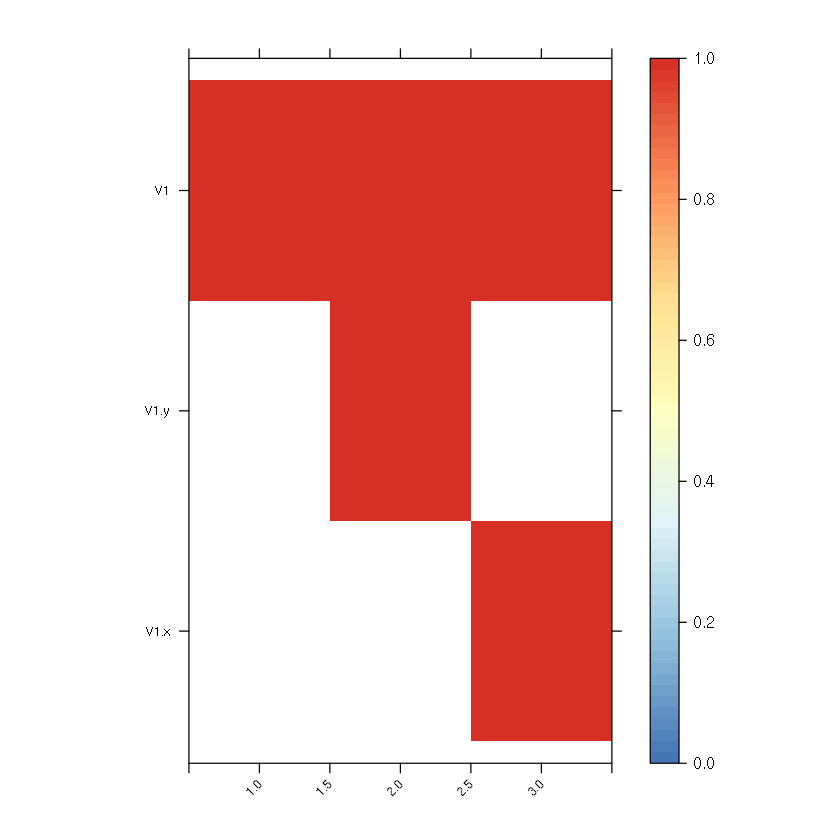

In [51]:
plot_sharing(TEEM$U$FLASH_1)
plot_sharing(UDR$U$FLASH_1)
plot_sharing(Ori$FLASH_1)
TEEM$U$FLASH_1
UDR$U$FLASH_1
Ori$FLASH_1


In [60]:
cov2cor(TEEM$U$FLASH_NC_1)
cov2cor(TEEM$U$FLASH_NC_2)
cov2cor(TEEM$U$FLASH_NC_3)
cov2cor(TEEM$U$FLASH_1)

,V1.x,V1.y,V1
V1.x,1.0000000,0.4373365,0.8229308
V1.y,0.4373365,1.0000000,0.8708263
V1,0.8229308,0.8708263,1.0000000


,V1.x,V1.y,V1
V1.x,1.0000000,0.3873686,0.3958910
V1.y,0.3873686,1.0000000,0.9999571
V1,0.3958910,0.9999571,1.0000000


,V1.x,V1.y,V1
V1.x,1,1,1
V1.y,1,1,1
V1,1,1,1


,V1.x,V1.y,V1
V1.x,1.0000000,0.5174102,0.8746238
V1.y,0.5174102,1.0000000,0.8674027
V1,0.8746238,0.8674027,1.0000000


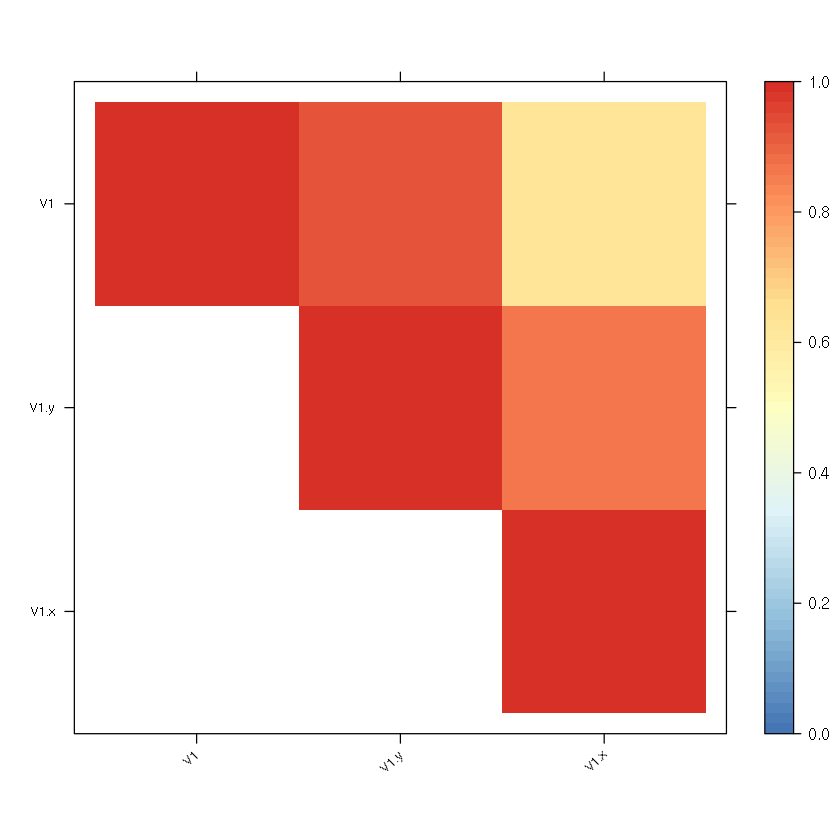

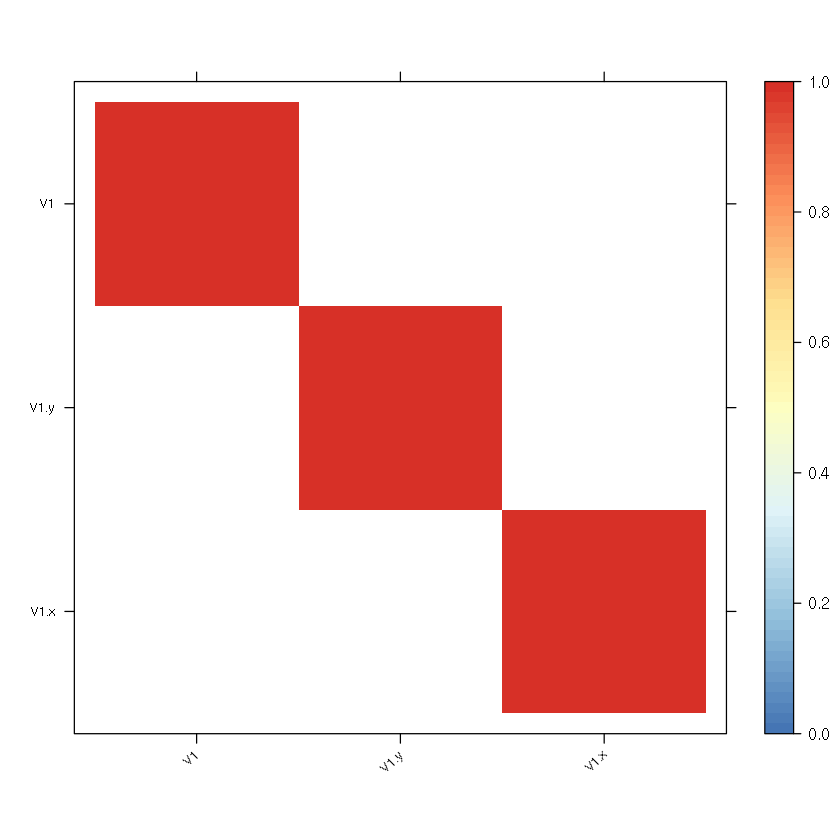

In [35]:
plot_sharing(TEEM$U$PCA_2)
plot_sharing(UDR$U$PCA_2)


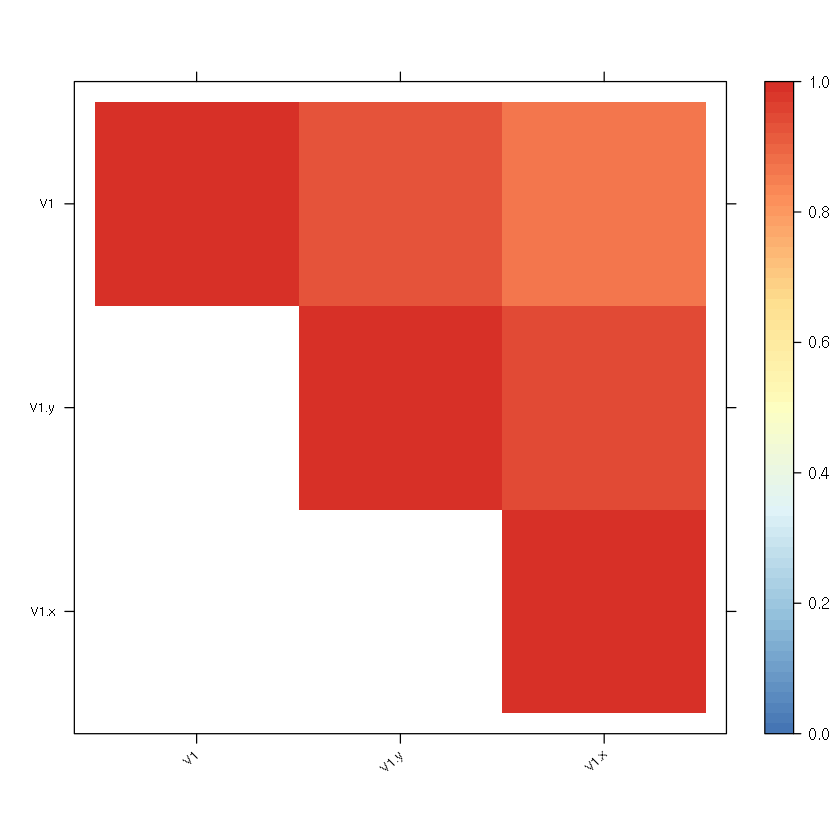

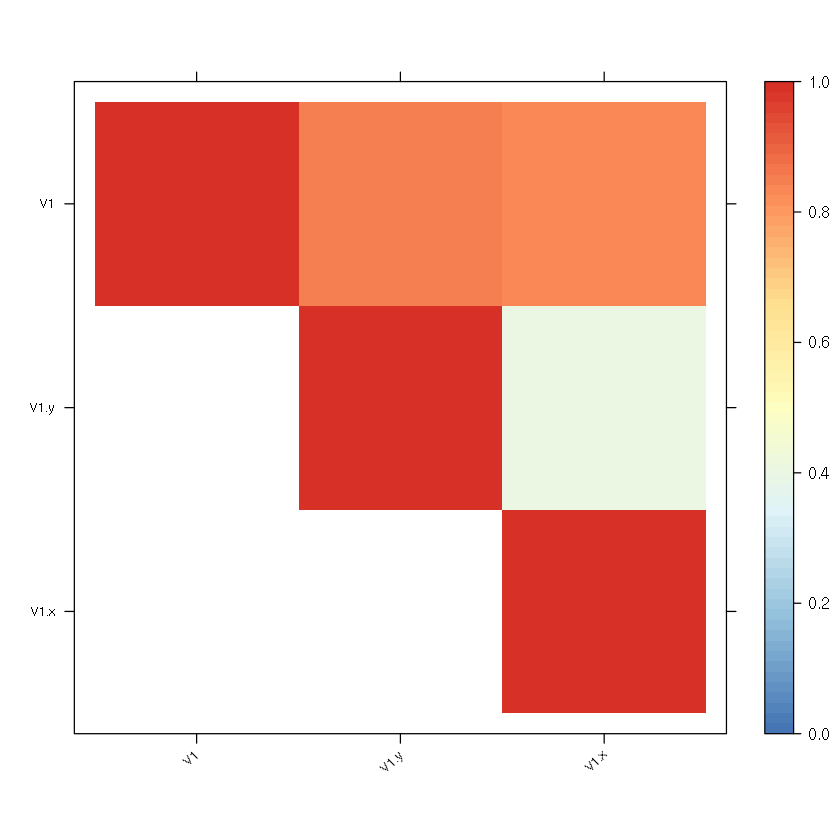

In [36]:
plot_sharing(TEEM$U$XX)
plot_sharing(UDR$U$XX)

In [39]:
UDR$U$XX%>%cov2cor
TEEM$U$XX%>%cov2cor

,V1.x,V1.y,V1
V1.x,1.0000000,0.4058815,0.8330067
V1.y,0.4058815,1.0000000,0.8413912
V1,0.8330067,0.8413912,1.0000000


,V1.x,V1.y,V1
V1.x,1.0000000,0.9422622,0.8650419
V1.y,0.9422622,1.0000000,0.9244859
V1,0.8650419,0.9244859,1.0000000


## Accuracy of the CV results

In [14]:
# Load data
env_teem = attach("/home/hs3163/Project/Alz/multi_mp/mv_cv.RData")
env_udr = attach("/home/hs3163/Project/Alz/multi_mp_2/mv_cv.RData")

The following object is masked from file:/home/hs3163/Project/Alz/multi_mp_2/mv_cv.RData:

    output


The following object is masked from file:/home/hs3163/Project/Alz/multi_mp/mv_cv.RData (pos = 10):

    output


The following object is masked from file:/home/hs3163/Project/Alz/multi_mp/mv_cv.RData (pos = 3):

    output


The following object is masked from file:/home/hs3163/Project/Alz/multi_mp_2/mv_cv.RData (pos = 9):

    output


The following object is masked from file:/home/hs3163/Project/Alz/multi_mp/mv_cv.RData (pos = 11):

    output




### TEEM

In [23]:
# All three tissues




mean(n_of_cs),mean(total_cs_size),mean(mean_cs_size)
<dbl>,<dbl>,<dbl>
0.4556962,7.21519,NaN


[1] 57

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”


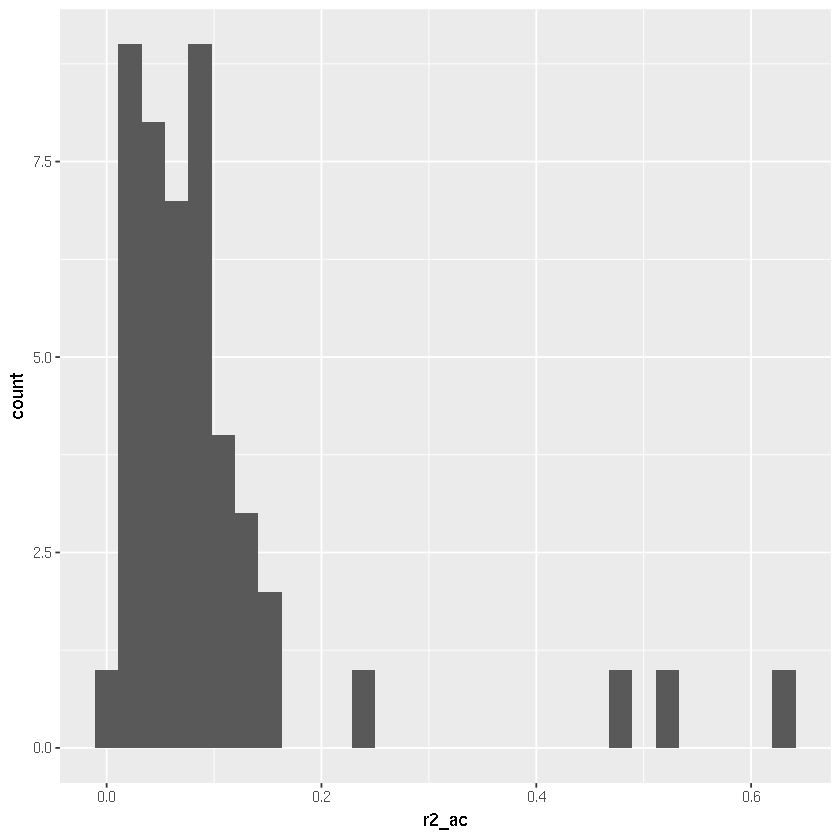

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”


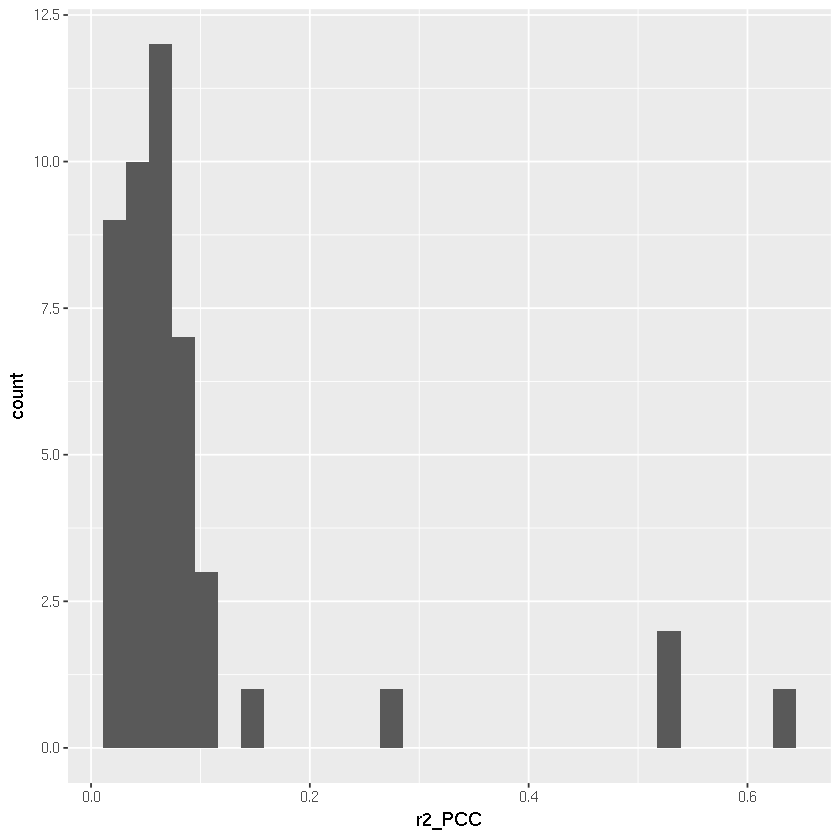

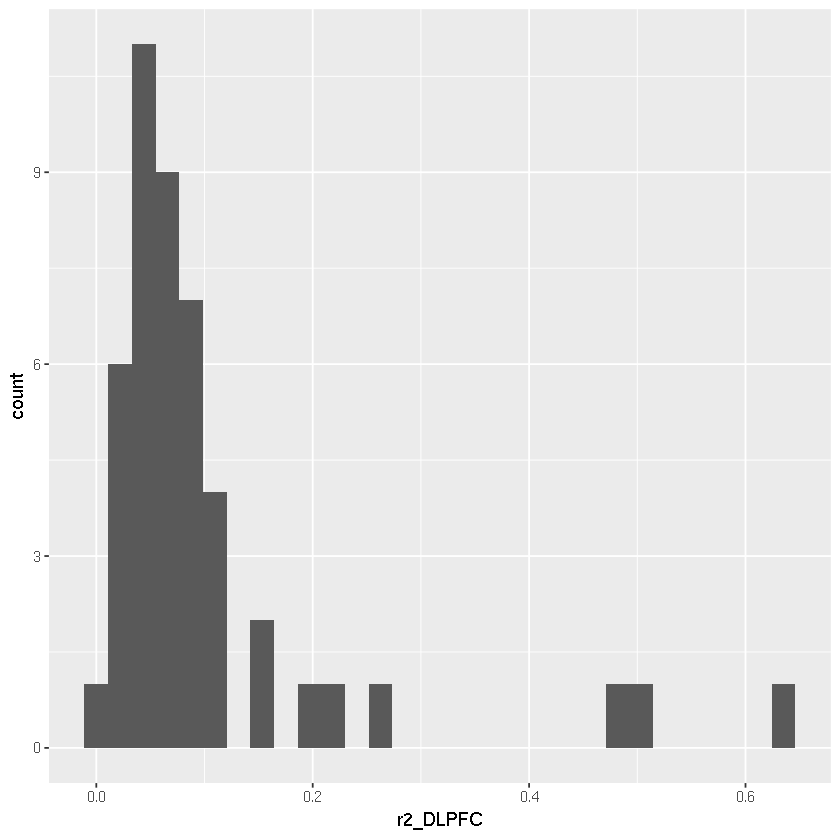

In [29]:
data = env_teem$output
working = data%>%select(-path)
working = working%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working%>%select(-env,-model
                )%>%summarise(mean(n_of_cs),mean(total_cs_size),mean(mean_cs_size))
nrow(working%>%filter(n_of_cs>0))
working = working%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]),
  r2_PCC = map_dbl(model,~.x$r2[2]),
  r2_DLPFC = map_dbl(model,~.x$r2[3]),
  pval_ac = map_dbl(model,~.x$pval[1]),
  pval_PCC = map_dbl(model,~.x$pval[2]),
  pval_DLPFC = map_dbl(model,~.x$pval[3])
)
#working%>%filter(n_of_cs > 0)%>%select(ID,n_of_cs,rmse_ac,rmse_PCC,rmse_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%arrange(-r2_DLPFC)
working%>%select(-env,-model
                )%>%filter(n_of_cs > 0)%>%ggplot(aes(x = r2_ac))+geom_histogram()
working%>%select(-env,-model
                )%>%filter(n_of_cs > 0)%>%ggplot(aes(x = r2_PCC))+geom_histogram()
working%>%select(-env,-model
                )%>%filter(n_of_cs > 0)%>%ggplot(aes(x = r2_DLPFC))+geom_histogram()



## UDR

mean(n_of_cs),mean(total_cs_size),mean(mean_cs_size)
<dbl>,<dbl>,<dbl>
0.4493671,6.841772,NaN


[1] 56

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 10 rows containing non-finite values (stat_bin).”


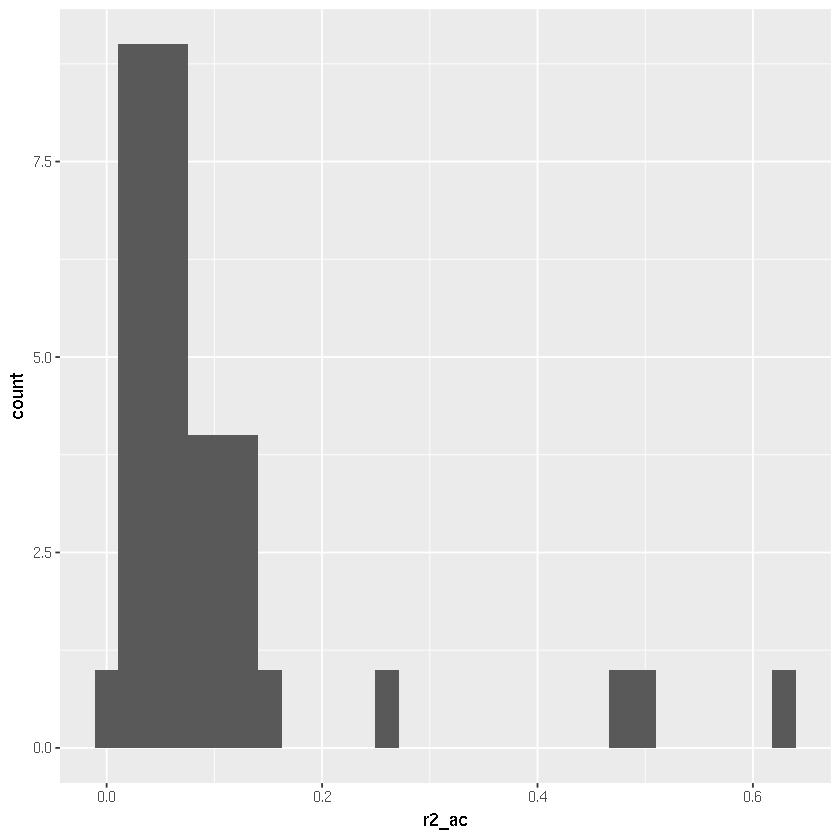

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”


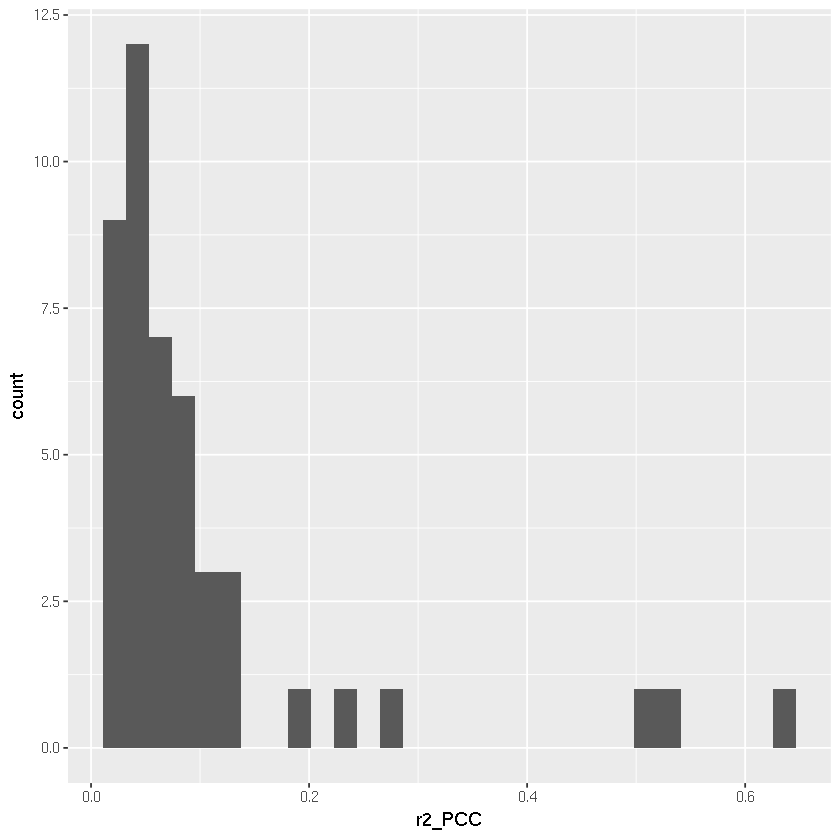

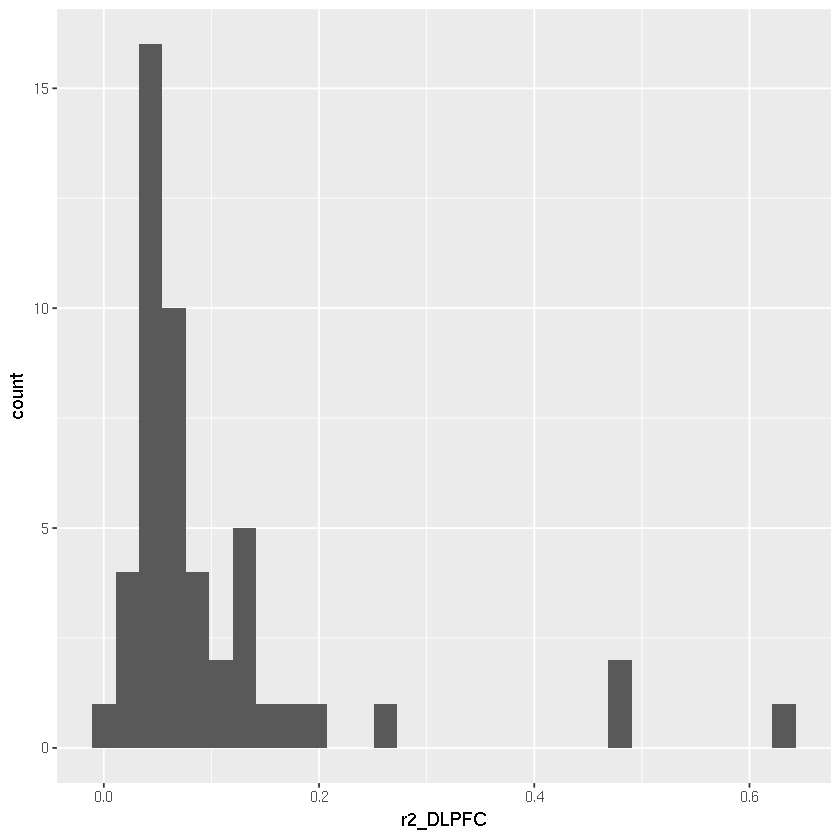

In [30]:
# All three tissues
data = env_udr$output
working = data%>%select(-path)
working = working%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working%>%select(-env,-model
                )%>%summarise(mean(n_of_cs),mean(total_cs_size),mean(mean_cs_size))
nrow(working%>%filter(n_of_cs>0))

working = working%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]),
  r2_PCC = map_dbl(model,~.x$r2[2]),
  r2_DLPFC = map_dbl(model,~.x$r2[3]),
  pval_ac = map_dbl(model,~.x$pval[1]),
  pval_PCC = map_dbl(model,~.x$pval[2]),
  pval_DLPFC = map_dbl(model,~.x$pval[3])
)
#working%>%filter(n_of_cs > 0)%>%select(ID,n_of_cs,rmse_ac,rmse_PCC,rmse_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%arrange(-r2_DLPFC)
working%>%select(-env,-model
                )%>%filter(n_of_cs > 0)%>%ggplot(aes(x = r2_ac))+geom_histogram()
working%>%select(-env,-model
                )%>%filter(n_of_cs > 0)%>%ggplot(aes(x = r2_PCC))+geom_histogram()
working%>%select(-env,-model
                )%>%filter(n_of_cs > 0)%>%ggplot(aes(x = r2_DLPFC))+geom_histogram()


vis = working%>%select(-env,-model
                )

In [47]:
vis%>%filter(n_of_cs > 0)%>%arrange(-r2_ac)%>%select(ID,r2_ac,pval_ac,pval_PCC,pval_DLPFC)%>%filter(pval_DLPFC<0.05/158)

ID,tb_name,n_of_cs,hsq_ac,hsq_PCC,hsq_DLPFC,total_cs_size,mean_cs_size,rmse_ac,rmse_PCC,rmse_DLPFC,r2_ac,r2_PCC,r2_DLPFC,pval_ac,pval_PCC,pval_DLPFC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000198502,full_model,3,0.513690757,0.3733669852,0.650189053,78,26.000000,0.6013591,0.6108765,0.6014304,0.638675312,0.63006173,0.639737191,1.368778e-16,1.312969e-13,2.330969e-20
ENSG00000179344,full_model,3,0.470226664,0.3636302831,0.576065407,19,6.333333,0.7174016,0.6954099,0.7291190,0.492327635,0.51828701,0.481975174,1.563635e-10,2.431766e-08,1.689402e-14
ENSG00000196126,full_model,2,0.376738273,0.3234972332,0.496066522,117,58.500000,0.7263094,0.6846980,0.7225917,0.468814751,0.52016805,0.474740162,1.152171e-09,1.784386e-12,5.230951e-15
ENSG00000196735,full_model,1,0.223702518,0.1719917941,0.265189108,63,63.000000,0.8534031,0.8573006,0.8582561,0.258585296,0.26981092,0.265060385,7.270027e-06,1.048668e-05,6.409206e-08
ENSG00000244731,full_model,1,0.162420931,0.0877330362,0.043079838,17,17.000000,0.9133871,0.9401645,0.9791630,0.157380289,0.09462677,0.047792937,1.960529e-03,3.315583e-02,4.196609e-02
ENSG00000140416,full_model,1,0.023222006,0.0079174467,0.031435861,14,14.000000,0.9868987,1.0029661,0.9927806,0.131208320,0.11775367,0.129527138,2.886568e-01,4.240775e-01,2.738263e-01
ENSG00000065268,full_model,2,0.212336632,0.1273751892,0.058674478,7,3.500000,0.9367841,0.9532727,0.9763230,0.122287617,0.11024193,0.034492392,5.190362e-02,6.080253e-02,1.782887e-01
ENSG00000213420,full_model,1,0.008992798,0.0091912830,0.024500893,4,4.000000,0.9887634,1.0146612,0.9712136,0.122064874,0.12129158,0.125250858,5.091898e-01,4.649291e-01,3.728670e-01
ENSG00000108523,full_model,1,0.123434821,0.0562238271,0.014748901,8,8.000000,0.9569086,0.9769366,0.9952978,0.122005421,0.08878547,0.054732420,1.149972e-01,1.873029e-01,3.771616e-01


In [63]:
b = read_delim("/home/hs3163/Project/Genome_prior/data/rds_list",delim = "\t")

Parsed with column specification:
cols(
  `#File` = col_character()
)



In [79]:
read.table(text = a[[1,1]], sep = ".", as.is = TRUE)$V2

[1] "ENSG00000000419"

In [82]:
a = tibble(`#region`= read.table(file = "/home/hs3163/Project/Genome_prior/data/rds_list", sep = ".", as.is = TRUE)$V2,
          `ct` = 3)

In [85]:
a%>%write_delim("/home/hs3163/Project/Alz_WG/mv_wg/wg_rds_list",delim = "\t")

In [88]:
a = readRDS("~/Project/Genome_prior/constriant/output/geneTpmResidualsAgeGenderAdj_rename.Constraint.flash.FL_PC3.ed.UD_ED.rds")

In [171]:
a = attach("~/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000198502.wgt.RDat")

The following objects are masked from file:~/Project/Alz/Alz_AC_SNP/WEIGHTS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000198502.wgt.RDat (pos = 11):

    cv.performance, hsq, hsq.pv, N.tot, snps, wgt.matrix




In [94]:
a$cv.performance

,bslmm,blup,lasso,top1,enet
rsq,5.784738e-01,7.551376e-01,7.423915e-01,6.079474e-01,7.531486e-01
pval,1.619715e-126,1.170122e-204,2.325631e-197,6.008534e-137,1.705343e-203


In [95]:
a$hsq

[1] 0.625287 0.051060

In [99]:
a$hsq.pv

[1] 0

In [100]:
a$N.tot

[1] 664

In [173]:
a$snps%>%filter(V2 %in% c("6:32017522_A_G","6:32019769_A_G"))

V1,V2,V3,V4,V5,V6
<int>,<chr>,<int>,<int>,<chr>,<chr>
6,6:32017522_A_G,0,32017522,A,G
6,6:32019769_A_G,0,32019769,A,G


In [172]:
class(a$)

[1] "environment"

In [130]:
b = attach("~/Project/Alz/multi_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.mv_susie.model.cv.RData")
c = attach("~/Project/Alz/multi_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.mv_susie.model.cv_diag.RData")

The following object is masked from file:~/Project/Alz/multi_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.mv_susie.model.cv.RData (pos = 3):

    full_model


The following object is masked from file:~/Project/Alz/multi_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.mv_susie.model.cv.RData (pos = 4):

    full_model


The following object is masked from file:~/Project/Alz/multi_3/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.mv_susie.model.cv.RData (pos = 5):

    full_model


Warning message:
“namespace ‘mmbr’ is not available and has been replaced
by .GlobalEnv when processing object ‘cv_df’”


In [106]:
b$m_ENSG00000007047$coef

-7.792014e-05,5.882388e-03,7.987946e-03
1.199607e-25,2.900137e-25,6.045866e-26
1.612621e-25,7.804376e-25,7.896641e-26
7.805483e-26,7.868865e-26,2.242562e-25
7.978987e-25,1.111314e-24,6.737607e-25
5.756169e-25,1.002065e-24,4.974413e-25
5.756169e-25,1.002065e-24,4.974413e-25
5.756169e-25,1.002065e-24,4.974413e-25
5.756169e-25,1.002065e-24,4.974413e-25
3.258598e-25,6.831742e-25,2.595874e-25
5.561600e-25,8.904882e-25,4.585934e-25


In [114]:
b$m_ENSG00000007047$coef[2:nrow(b$m_ENSG00000007047$coef),]

1.199607e-25,2.900137e-25,6.045866e-26
1.612621e-25,7.804376e-25,7.896641e-26
7.805483e-26,7.868865e-26,2.242562e-25
7.978987e-25,1.111314e-24,6.737607e-25
5.756169e-25,1.002065e-24,4.974413e-25
5.756169e-25,1.002065e-24,4.974413e-25
5.756169e-25,1.002065e-24,4.974413e-25
5.756169e-25,1.002065e-24,4.974413e-25
3.258598e-25,6.831742e-25,2.595874e-25
5.561600e-25,8.904882e-25,4.585934e-25
5.756169e-25,1.002065e-24,4.974413e-25


In [116]:
b = attach("~/Project/Alz/multi_mp_2/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000147419.transformed_XY.RData")

In [121]:
b$scaled_ENSG00000147419[[1]]%>%colnames()

[1] "8:27236228_A_G" "8:27236505_A_C" "8:27237041_A_G" "8:27237206_A_G"
   [5] "8:27238826_A_G" "8:27239258_C_T" "8:27240166_A_G" "8:27240555_A_C"
   [9] "8:27240698_A_G" "8:27241082_A_G" "8:27241353_C_T" "8:27242622_A_T"
  [13] "8:27243595_A_G" "8:27246778_A_G" "8:27247298_C_T" "8:27247339_A_G"
  [17] "8:27247647_C_T" "8:27247662_C_G" "8:27248561_G_T" "8:27248573_A_T"
  [21] "8:27248667_A_G" "8:27248762_C_T" "8:27248894_A_G" "8:27248985_C_G"
  [25] "8:27249077_C_T" "8:27249328_C_G" "8:27249458_A_G" "8:27250821_C_T"
  [29] "8:27250933_A_G" "8:27251051_C_T" "8:27251546_C_G" "8:27252633_C_T"
  [33] "8:27252746_C_G" "8:27252881_A_G" "8:27253951_A_G" "8:27254113_G_T"
  [37] "8:27255003_A_G" "8:27255128_C_T" "8:27255146_A_G" "8:27256263_C_T"
  [41] "8:27256314_C_G" "8:27256359_A_G" "8:27256918_A_G" "8:27257787_G_T"
  [45] "8:27258086_A_G" "8:27258195_A_G" "8:27258313_A_G" "8:27258634_C_T"
  [49] "8:27259426_A_G" "8:27260404_G_T" "8:27260813_A_G" "8:27261815_A_G"
  [53] "8:27262195_C_T" "8:27263433_G_T" "8:27264245_A_C" "8:27264952_A_G"
  [57] "8:27265065_A_G" "8:27265371_C_T" "8:27266465_C_T" "8:27268168_C_T"
  [61] "8:27269416_C_T" "8:27269572_C_G" "8:27269607_A_G" "8:27269743_C_T"
  [65] "8:27269884_G_T" "8:27270483_A_T" "8:27272121_C_G" "8:27272123_C_G"
  [69] "8:27272585_A_G" "8:27273348_C_T" "8:27273630_A_C" "8:27274243_C_T"
  [73] "8:27274431_A_G" "8:27274631_G_T" "8:27274724_A_G" "8:27274931_C_T"
  [77] "8:27275294_A_G" "8:27275352_A_G" "8:27275509_A_G" "8:27275518_A_G"
  [81] "8:27275649_G_T" "8:27275794_C_T" "8:27275904_C_T" "8:27276111_C_T"
  [85] "8:27276209_C_T" "8:27276526_A_C" "8:27276705_A_G" "8:27277537_A_G"
  [89] "8:27277642_A_G" "8:27278031_A_G" "8:27279400_A_C" "8:27281267_A_G"
  [93] "8:27281896_C_T" "8:27281912_A_G" "8:27282771_G_T" "8:27284394_A_G"
  [97] "8:27285178_A_G" "8:27285533_A_G" "8:27285725_C_G" "8:27286379_A_G"
 [101] "8:27287997_A_T" "8:27288033_C_T" "8:27288075_A_G" "8:27288314_C_T"
 [105] "8:27289126_A_G" "8:27289321_C_T" "8:27289409_C_G" "8:27289412_C_G"
 [109] "8:27289935_C_T" "8:27289963_C_T" "8:27290018_G_T" "8:27290528_A_G"
 [113] "8:27292287_A_G" "8:27293989_A_G" "8:27294532_C_G" "8:27294606_C_G"
 [117] "8:27295109_A_G" "8:27296090_A_G" "8:27297202_C_T" "8:27297594_A_G"
 [121] "8:27297625_C_G" "8:27298078_A_G" "8:27298409_A_G" "8:27299087_A_C"
 [125] "8:27299653_C_G" "8:27300088_C_T" "8:27300621_A_C" "8:27301451_A_G"
 [129] "8:27302433_A_G" "8:27303015_C_T" "8:27303126_A_G" "8:27306159_A_G"
 [133] "8:27306551_A_T" "8:27307072_A_G" "8:27307275_C_G" "8:27308004_A_G"
 [137] "8:27308538_A_G" "8:27308849_A_G" "8:27309339_C_T" "8:27309657_C_T"
 [141] "8:27310546_A_G" "8:27311244_A_T" "8:27311376_A_G" "8:27312135_A_G"
 [145] "8:27312426_A_G" "8:27312687_A_T" "8:27312809_A_G" "8:27313355_A_C"
 [149] "8:27313639_G_T" "8:27314819_A_G" "8:27315876_A_G" "8:27315900_A_G"
 [153] "8:27316117_A_G" "8:27317195_A_C" "8:27317337_A_G" "8:27317762_A_G"
 [157] "8:27318425_A_C" "8:27318544_A_G" "8:27318635_C_G" "8:27319906_A_G"
 [161] "8:27320636_A_G" "8:27321189_A_G" "8:27321666_C_T" "8:27322434_C_G"
 [165] "8:27322872_A_G" "8:27322974_A_G" "8:27323182_C_G" "8:27323391_A_G"
 [169] "8:27323403_A_C" "8:27323607_G_T" "8:27323726_G_T" "8:27323822_A_C"
 [173] "8:27323833_A_G" "8:27324367_A_C" "8:27324429_C_T" "8:27324844_A_G"
 [177] "8:27325257_A_G" "8:27325423_A_G" "8:27325473_A_C" "8:27325940_A_G"
 [181] "8:27327841_C_G" "8:27328021_A_G" "8:27328127_C_G" "8:27328409_A_G"
 [185] "8:27328511_A_G" "8:27330791_C_T" "8:27330813_C_T" "8:27331119_A_G"
 [189] "8:27331277_C_T" "8:27334379_A_G" "8:27335734_C_T" "8:27335898_A_T"
 [193] "8:27336628_A_G" "8:27336767_A_T" "8:27336978_A_G" "8:27337227_A_G"
 [197] "8:27337896_A_T" "8:27338347_A_C" "8:27338359_A_G" "8:27338762_C_G"
 [201] "8:27339354_C_T" "8:27341178_A_G" "8:27342353_C_T" "8:27344198_C_T"
 [205] "8:27344360_G_T" "8:27344719_A_G" "8:27344983_A_G" "8:27345426_C_T"
 [209] "8:27347194_C_T" "8:27347734_A_C" "8:27348195_A_G" "8:27348387_A_G"
 [213] "8:27349838_C_T" "8:2

In [122]:
cv.performance

,bslmm,blup,lasso,top1,enet
rsq,5.784738e-01,7.551376e-01,7.423915e-01,6.079474e-01,7.531486e-01
pval,1.619715e-126,1.170122e-204,2.325631e-197,6.008534e-137,1.705343e-203


In [180]:
d = rbind(rsq = b$full_model$r2, pval = b$full_model$pval)
colnames(d) = c("mv_ac","mv_pcc","mv_DLPFC") 
d[,1]%>%as.matrix()

rsq,NaN
pval,NaN


In [127]:
b$full_model$hsq

[1] 0.03690972 0.05454983 0.08102939

In [137]:
 c$cv_df%>%pull(pval)%>%as.data.frame()%>%t()%>%as_tibble()%>%na.omit%>%colMeans

V1        V2        V3 
0.2955853 0.3052289 0.1704031

In [148]:
a = read_delim('~/Project/Alz/multi/molecular_phenotype_list',delim = '\t')

Parsed with column specification:
cols(
  `#molc_pheno` = col_character()
)



In [169]:
for(i in 1:nrow(a)){tis = read.table(text = a[[i,1]], sep = "/", as.is = TRUE)
                   tis = tis[[length(tis)]]
                    print(tis)
                   }

[1] "Alz_AC_SNP"
[1] "Alz_PCC_SNP"
[1] "Alz_DLPFC_SNP"


In [182]:
a = read_delim("/home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt",delim = "\t")

Parsed with column specification:
cols(
  SNP = col_character(),
  CHR = col_double(),
  BP = col_double(),
  A1 = col_character(),
  A2 = col_character(),
  SNP_rsID = col_character(),
  Z = col_double(),
  P = col_double(),
  Nsum = col_double(),
  Neff = col_double(),
  dir = col_character(),
  EAF = col_double(),
  BETA = col_double(),
  SE = col_double()
)



In [183]:
b = read_delim("~/Project/mwe/mv_susie_mwe/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.merged.bim",delim = "\t")

Parsed with column specification:
cols(
  `6` = col_double(),
  `6:32079567_C_T` = col_character(),
  `0` = col_double(),
  `32079567` = col_double(),
  C = col_character(),
  T = col_character()
)



In [189]:
c = a%>%filter(SNP %in% b$`6:32079567_C_T`)

In [192]:
c%>%write_delim("~/Project/mwe/ass_test_mwe/sumstat_mwe.txt",delim = "\t" )